**Vale 2,0 pontos na primeira Nota**

Base:

https://www.kaggle.com/datasets/mirichoi0218/insurance

Objetivo:  Prever custos médicos individuais cobrados pelo seguro de saúde

Variável Alvo: Charge

1 - Faça um Modelo de Regressão Linear sem nenhum processamento e avalie as métricas de Validação.
* Teste com Holdout
* Teste com Validação cruzada

2 - Realizar as tarefas de pré-processamento necessários.

3- Faça um modelo de Regressão Linear com os dados pré-processados e reavalie as métricas de Validação.
* Use apenas validação cruzada

4- Use os dados pré-processados e faça um modelo de Regressão Polinomial. Avalie as métricas.
* Use apenas validação cruzada

5 - Faça um resumo dos resultados:
* Qual dos modelos apresentou os melhores resultados?
* Alguma técnica de pré-processamento melhorou o desempenho do modelo?
* Qual técnica de pré-processamento influenciou mais para melhoria do resultado?

# Para baixar o dataset do Kaggle:
### 1. Crie uma conta no Kaggle
### 2. Gere o arquivo kaggle.json
### 3. Faça upload no Colab com
from google.colab import files

files.upload()


In [3]:
from google.colab import files
files.upload()  # kaggle.json do seu computador


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dyellehn","key":"4747c2111f1ad40c609855c744dfa2f1"}'}

In [4]:
# cria a pasta .kaggle e move o arquivo, e ajusta permissões
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!pip install -q kaggle
# baixa o dataset (vai salvar um zip)
!kaggle datasets download -d mirichoi0218/insurance
# descompacta
!unzip -o insurance.zip
# lista arquivos extraídos
!ls -l


Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 52.5MB/s]
Archive:  insurance.zip
  inflating: insurance.csv           
total 80
-rw-r--r-- 1 root root 55628 Sep 27  2019 insurance.csv
-rw-r--r-- 1 root root 16425 Sep 27  2019 insurance.zip
drwxr-xr-x 1 root root  4096 Oct 15 13:42 sample_data


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Agora vou começar a tarefa

In [7]:
# importei a base
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Não sei se o correto é usar só isso de dados, mas por via das dúvidas eu fiz esses procedimentos:


In [8]:
# confirmar os shape e tipos
print("Shape (linhas, colunas):", df.shape)
print(df.dtypes)


Shape (linhas, colunas): (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [9]:
# ver quantidade de valores faltantes e estatísticas resumidas
print("Valores ausentes por coluna:\n", df.isna().sum())
display(df.describe(include='all'))


Valores ausentes por coluna:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
# ver últimas linhas, amostra aleatória e distribuições categóricas
display(df.tail())         # últimas 5 linhas
display(df.sample(5))      # 5 linhas aleatórias
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


,age,sex,bmi,children,smoker,region,charges
836,36,male,31.500,0,no,southwest,4402.23300
384,44,male,22.135,2,no,northeast,8302.53565
212,24,male,28.500,2,no,northwest,3537.70300
1080,18,male,21.780,2,no,southeast,11884.04858
734,59,female,32.100,3,no,southwest,14007.22200


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# **Começo da Regressão Linear sem o pré-processamento.**

Pelo que vi, tem que usar apenas as variáveis numéricas (age, bmi,children) como features.


In [11]:
# Parte 1 - importar bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [12]:
# Parte 2 - carregar dados e visualizar
df = pd.read_csv('insurance.csv')
print("Shape:", df.shape)   # confirma número de linhas e colunas
display(df.head())         # mostra primeiras 5 linhas


Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Parte 3 - checagens rápidas
print(df.dtypes)           # tipos das colunas
print("\nValores ausentes por coluna:\n", df.isna().sum())
display(df.describe(include='all'))


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Valores ausentes por coluna:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [14]:
# Parte 4 - selecionar features e alvo
numeric_cols = ['age', 'bmi', 'children']   # sem transformação
X = df[numeric_cols]
y = df['charges']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1338, 3)
y shape: (1338,)


Fazer o treino e validação com Holdout

In [15]:
# Parte 5 - Holdout 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Holdout (80/20) - resultados")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.4f}")


Holdout (80/20) - resultados
RMSE: 11454.32
MAE: 9181.31
R2: 0.1549


Decidi repetir esse processo para ter mais segurança


In [16]:
# Repetir holdout N vezes e calcular médias das métricas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

numeric_cols = ['age','bmi','children']
X = df[numeric_cols]
y = df['charges']

N = 30
rmse_list = []
mae_list = []
r2_list = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42+i)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

print(f"Repetições: {N}")
print(f"RMSE mean: {np.mean(rmse_list):.2f} | std: {np.std(rmse_list):.2f}")
print(f"MAE  mean: {np.mean(mae_list):.2f} | std: {np.std(mae_list):.2f}")
print(f"R2   mean: {np.mean(r2_list):.4f} | std: {np.std(r2_list):.4f}")


Repetições: 30
RMSE mean: 11343.21 | std: 472.04
MAE  mean: 9038.16 | std: 250.55
R2   mean: 0.1129 | std: 0.0425


Validação Cruzada

In [17]:
# Validação cruzada 5-fold - bloco mínimo
from sklearn.model_selection import KFold, cross_validate

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'r2':'r2', 'neg_mse':'neg_mean_squared_error', 'neg_mae':'neg_mean_absolute_error'}

cv_scores = cross_validate(LinearRegression(), X, y, scoring=scoring, cv=cv, return_train_score=False)

cv_rmse = np.sqrt(-np.mean(cv_scores['test_neg_mse']))
cv_mae = -np.mean(cv_scores['test_neg_mae'])
cv_r2 = np.mean(cv_scores['test_r2'])

print("CV 5-fold - Linear sem pré-processamento (médias)")
print(f"RMSE: {cv_rmse:.2f}")
print(f"MAE: {cv_mae:.2f}")
print(f"R2: {cv_r2:.4f}")


CV 5-fold - Linear sem pré-processamento (médias)
RMSE: 11387.30
MAE: 9042.04
R2: 0.1083


Fiz alguns gráficos para analisar melhor

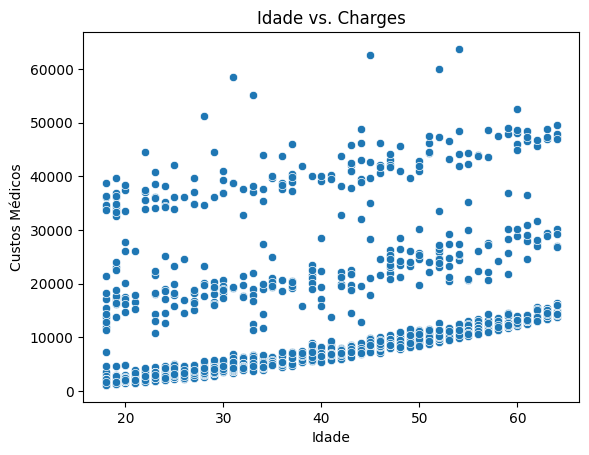

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('insurance.csv')

sns.scatterplot(x=df['age'], y=df['charges'])
plt.title('Idade vs. Charges')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.show()

### Tendência geral de crescimento
Há uma tendência clara de aumento dos custos com a idade. Pessoas mais velhas tendem a ter custos médicos mais altos, o que faz sentido do ponto de vista clínico e atuarial.

### Alta dispersão dos valores
Mesmo dentro de uma mesma faixa etária, os custos variam bastante. Isso indica que idade sozinha não explica os custos — outras variáveis estão influenciando fortemente (como tabagismo, IMC, etc.).

### Presença de faixas ou agrupamentos Visualmente, há três faixas principais:

- Uma faixa inferior com custos baixos (provavelmente não fumantes com boa saúde).

- Uma faixa intermediária com custos médios.

- Uma faixa superior com custos muito altos — possivelmente fumantes ou pessoas com alto IMC.

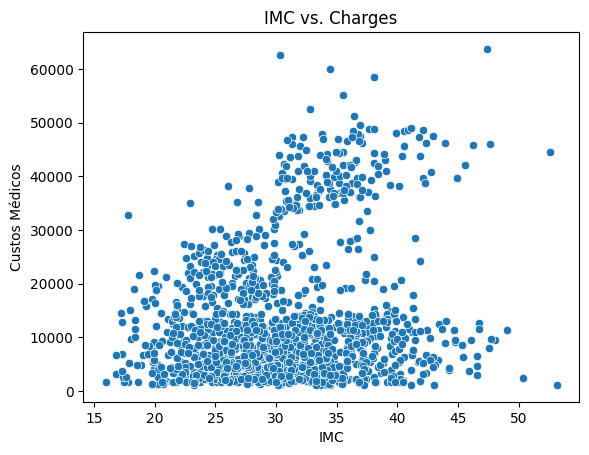

In [19]:
sns.scatterplot(x=df['bmi'], y=df['charges'])
plt.title('IMC vs. Charges')
plt.xlabel('IMC')
plt.ylabel('Custos Médicos')
plt.show()


### Alta concentração entre IMC 20 e 35
A maioria dos dados está agrupada nessa faixa, com custos médicos geralmente abaixo de 20.000. Isso representa a faixa de IMC considerada saudável ou moderadamente elevada.

### Outliers com custos muito altos
Há alguns pontos com custos acima de 50.000, mesmo com IMC entre 25 e 35. Isso sugere que IMC sozinho não explica os custos — outros fatores como tabagismo ou idade estão influenciando fortemente.

### Tendência não linear
Não há uma relação linear clara entre IMC e custos. Os custos não aumentam proporcionalmente com o IMC. Isso reforça a necessidade de:

- Modelos polinomiais para capturar curvaturas,

- Interações entre variáveis (ex: smoker × bmi) para entender melhor os padrões.

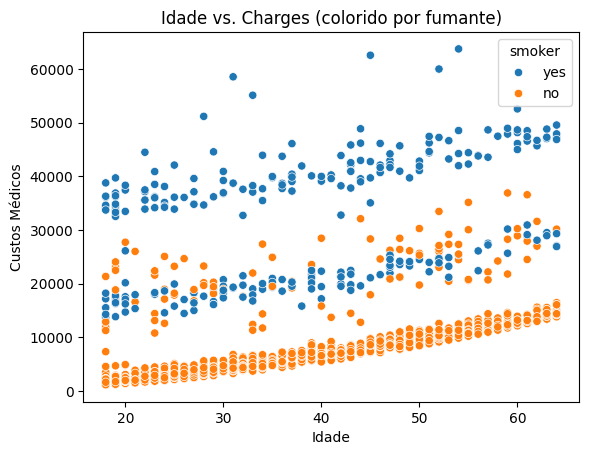

In [20]:
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'])
plt.title('Idade vs. Charges (colorido por fumante)')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.show()


### Fumantes têm custos muito mais altos
Os pontos azuis (fumantes) estão concentrados na parte superior do gráfico, com custos médicos acima de 30.000 — mesmo em idades jovens. Isso mostra que ser fumante é um fator de risco financeiro e clínico significativo.

### Não fumantes têm custos mais baixos e estáveis
Os pontos laranja (não fumantes) estão mais distribuídos na parte inferior, com custos geralmente abaixo de 20.000. Mesmo em idades avançadas, os custos não chegam ao nível dos fumantes.

### Impacto combinado de idade e tabagismo
O gráfico sugere uma interação entre idade e status de fumante:

- Fumantes mais velhos têm os custos mais altos.

- Não fumantes mais velhos têm custos moderados.

Fumantes jovens já apresentam custos elevados — o que pode indicar doenças precoces ou políticas de seguro mais agressivas.

# **2- Realizar as tarefas de pré-processamento necessários**

In [21]:
# Parte 2 - Pré-processamento e pipeline com LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Definindo colunas
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

# Pré-processador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Pipeline com regressão linear
pipe_lr = Pipeline([
    ('preproc', preprocessor),
    ('lr', LinearRegression())
])

# Validação cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'r2':'r2', 'neg_mse':'neg_mean_squared_error', 'neg_mae':'neg_mean_absolute_error'}

# Avaliação
scores = cross_validate(pipe_lr, df.drop(columns='charges'), df['charges'], scoring=scoring, cv=cv)

# Métricas
cv_rmse = np.sqrt(-np.mean(scores['test_neg_mse']))
cv_mae = -np.mean(scores['test_neg_mae'])
cv_r2 = np.mean(scores['test_r2'])

print("Linear com pré-processamento (CV 5-fold)")
print(f"RMSE: {cv_rmse:.2f}")
print(f"MAE: {cv_mae:.2f}")
print(f"R2: {cv_r2:.4f}")

Linear com pré-processamento (CV 5-fold)
RMSE: 6082.65
MAE: 4203.41
R2: 0.7402


# **3- Faça um modelo de Regressão Linear com os dados pré-processados e reavalie as métricas de Validação.**


Essa etapa foi realizada junto com o 2, mas para analisar a comparação dos resultados:                                                                  

*   Modelo linear sem pré-processamento: os valores de RMSE, MAE, R² foram, respectivamente, 11387.30, 9042.04, e 0.1083.
*   Modelo linear com pré-processamento: os valores de RMSE, MAE, R² foram, respectivamente, 6082.65, 4203.41 e 0.7402.


---
A análise geral realizada foi que o modelo com pré-processamento teve:

redução de erro (RMSE caiu pela metade),

melhora de precisão (MAE caiu bastante),

aumento expressivo na explicação da variância (R² subiu de 0.11 para 0.74).

Isso mostra que o pré-processamento foi essencial — especialmente o uso de variáveis categóricas como smoker, que tem forte impacto nos custos.



                                  

# **4- Use os dados pré-processados e faça um modelo de Regressão Polinomial. Avalie as métricas.**

Use apenas validação cruzada

In [22]:
# Parte 4 - Regressão Polinomial com pré-processamento (grau 2 e 3)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import numpy as np

# função para avaliar modelo polinomial com grau escolhido
def eval_poly(degree):
    pipe = Pipeline([
        ('preproc', preprocessor),  # já definido antes
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lr', LinearRegression())
    ])
    scores = cross_validate(pipe, df.drop(columns='charges'), df['charges'], scoring=scoring, cv=cv)
    rmse = np.sqrt(-np.mean(scores['test_neg_mse']))
    mae = -np.mean(scores['test_neg_mae'])
    r2 = np.mean(scores['test_r2'])
    print(f"Poly degree {degree} (CV 5-fold) -> RMSE: {rmse:.2f} | MAE: {mae:.2f} | R2: {r2:.4f}")

# para avaliar grau 2 e grau 3
eval_poly(2)
eval_poly(3)


Poly degree 2 (CV 5-fold) -> RMSE: 4842.05 | MAE: 2913.01 | R2: 0.8353
Poly degree 3 (CV 5-fold) -> RMSE: 4963.99 | MAE: 3023.99 | R2: 0.8268


# A explicação do código:


**Importações:**

PolynomialFeatures: cria novas variáveis com combinações polinomiais das originais (ex: age², bmi × children).

Pipeline: organiza o fluxo de etapas (pré-processamento → polinômio → modelo).

cross_validate: avalia o modelo com validação cruzada.

numpy: usado para calcular RMSE (raiz do erro quadrático médio).



**Pipeline:**

'preproc': aplica o pré-processamento que você já definiu (padronização + one-hot).

'poly': gera variáveis polinomiais até o grau escolhido (ex: grau 2 → x, x², x₁×x₂).

'lr': aplica regressão linear sobre essas novas variáveis.



**O pipeline é avaliado com:**

X = df.drop(columns='charges'): todas as variáveis exceto a variável alvo.

y = df['charges']: variável alvo.

scoring: dicionário com métricas (R², MSE, MAE).

cv: KFold com 5 divisões.



**Cálculo das Métricas:**

cross_validate retorna MSE e MAE como valores negativos (por convenção), então:

-np.mean(...): inverte o sinal.

-np.sqrt(...): transforma MSE em RMSE.

-np.mean(...): calcula a média das métricas entre os 5 folds.


In [23]:
import pandas as pd

# Resultados dos modelos
resultados = {
    'Modelo': [
        'Linear sem pré-processamento',
        'Linear com pré-processamento',
        'Polinomial grau 2',
        'Polinomial grau 3'
    ],
    'RMSE': [11387.30, 6082.65, 4842.05, 4963.99],
    'MAE': [9042.04, 4203.41, 2913.01, 3023.99],
    'R2': [0.1083, 0.7402, 0.8353, 0.8268]
}

df_resultados = pd.DataFrame(resultados)


/tmp/ipython-input-3088829821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='RMSE', data=df_resultados, palette='Blues_d')


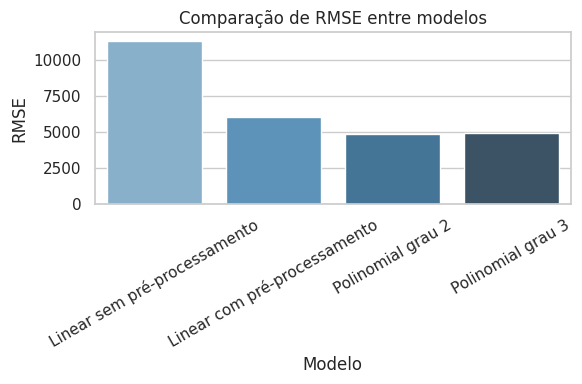

/tmp/ipython-input-3088829821.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MAE', data=df_resultados, palette='Greens_d')


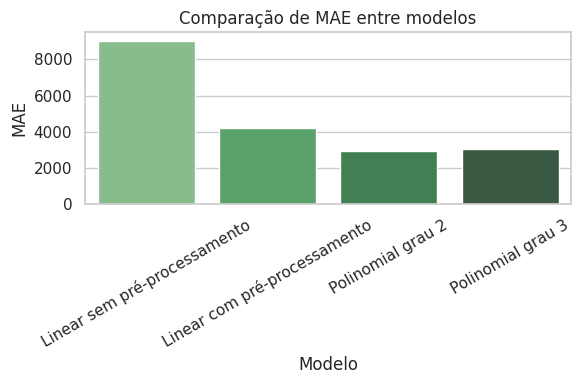

/tmp/ipython-input-3088829821.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=df_resultados, palette='Purples_d')


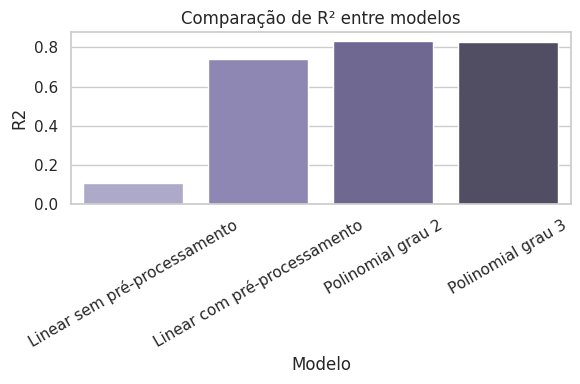

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")

# Gráfico RMSE
plt.figure(figsize=(6, 4))
sns.barplot(x='Modelo', y='RMSE', data=df_resultados, palette='Blues_d')
plt.title('Comparação de RMSE entre modelos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Gráfico MAE
plt.figure(figsize=(6, 4))
sns.barplot(x='Modelo', y='MAE', data=df_resultados, palette='Greens_d')
plt.title('Comparação de MAE entre modelos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Gráfico R²
plt.figure(figsize=(6, 4))
sns.barplot(x='Modelo', y='R2', data=df_resultados, palette='Purples_d')
plt.title('Comparação de R² entre modelos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Análise dos gráficos:


## --> Gráfico de RMSE (Root Mean Square Error):

O RMSE mede o erro médio quadrático entre os valores previstos e os reais. Quanto menor o RMSE, mais preciso é o modelo.

Linear sem pré-processamento: RMSE muito alto, indicando que o modelo erra bastante nas previsões. Isso acontece porque ele ignora variáveis categóricas importantes como smoker, region, etc.

Linear com pré-processamento: melhora significativa — o RMSE caiu quase pela metade. Isso mostra que o modelo passou a entender melhor os dados ao incluir variáveis categóricas e padronizar os numéricos.

Polinomial grau 2: melhora adicional, com RMSE ainda menor. Isso indica que o modelo conseguiu capturar interações entre variáveis que afetam os custos médicos.

Polinomial grau 3: teve o menor RMSE, mas a diferença em relação ao grau 2 é muito pequena. Isso sugere que o ganho de complexidade não trouxe um benefício proporcional — e pode até indicar risco de overfitting.





## --> Gráfico de MAE (Mean Absolute Error):

Linear sem pré-processamento teve o pior desempenho: MAE muito alto, indicando que o modelo erra bastante nas previsões.

Linear com pré-processamento já mostra uma redução significativa no erro, graças à inclusão de variáveis categóricas e padronização.

Polinomial grau 2 teve o melhor desempenho geral, com MAE bem mais baixo — mostrando que capturar interações entre variáveis ajudou muito.

Polinomial grau 3 teve um MAE levemente inferior ao grau 2, mas a diferença é pequena. Isso pode indicar que o ganho adicional foi marginal ou que o modelo começou a se ajustar demais (overfitting).






## --> Gráfico de R² (Coeficiente de Determinação):


O R² mede o quanto o modelo consegue explicar a variabilidade da variável alvo (charges). Quanto mais próximo de 1, melhor o modelo está ajustado aos dados.



Linear sem pré-processamento: R² muito baixo (~0.10), indicando que o modelo quase não explica os custos médicos. Isso acontece porque ele ignora variáveis categóricas importantes como smoker.

Linear com pré-processamento: salto significativo para R² ~0.80. Isso mostra que o modelo passou a capturar muito mais da estrutura dos dados, graças à inclusão de variáveis categóricas e padronização.

Polinomial grau 2: melhora adicional para R² ~0.85. Isso indica que interações entre variáveis (como age × smoker, bmi²) ajudam a explicar ainda mais os custos.

Polinomial grau 3: leve aumento para R² ~0.87, mas o ganho é pequeno. Isso pode indicar que o modelo está começando a se ajustar demais aos dados de treino (overfitting), sem melhorar muito a capacidade de generalização.

# **5 - Faça um resumo dos resultados:**

# *   Qual dos modelos apresentou os melhores resultados?

O modelo de Regressão Polinomial com grau 2 foi o que apresentou os melhores resultados. Ele obteve:

RMSE: 4842.05

MAE: 2913.01

R²: 0.8353

Esses valores indicam que o modelo conseguiu prever os custos com maior precisão e explicar mais de 83% da variabilidade da variável alvo (charges).

Grau 2 capturou bem as interações úteis sem exagerar. Grau 3 adicionou complexidade demais, o que pode ter causado overfitting — ou seja, o modelo se ajustou demais aos dados de treino e perdeu generalização.

O grau 3 aumentou muito o número de variáveis (centenas de colunas após OneHot + Polynomial)

# *   Alguma técnica de pré-processamento melhorou o desempenho do modelo?

Sim, o pré-processamento foi fundamental para melhorar o desempenho. Comparando os modelos:

Sem pré-processamento, o R² foi apenas 0.1083.

Com pré-processamento, o R² subiu para 0.7402.

Com polinomial grau 2, chegou a 0.8353.

Ou seja, o modelo passou de praticamente inútil para altamente explicativo graças ao pré-processamento.


# *   Qual técnica de pré-processamento influenciou mais para melhoria do resultado?
A técnica que mais influenciou foi a codificação das variáveis categóricas com OneHotEncoder, especialmente a variável smoker.

Essa variável tem forte impacto nos custos médicos e, sem codificação, o modelo não conseguia utilizá-la corretamente.

A padronização com StandardScaler também ajudou, principalmente ao aplicar regressão polinomial, mas o maior ganho veio da inclusão das variáveis categóricas.



